In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("D:\data preparing\datasets\italy-covid-daywise.csv")

In [18]:
data.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [20]:
data.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [21]:
data.isnull().sum()

date            0
new_cases       0
new_deaths      0
new_tests     113
dtype: int64

In [22]:

print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [23]:
data["new_cases"].dtype

dtype('float64')

In [24]:
data.duplicated().sum()

0

In [27]:
high_cases = data[data["new_cases"] > 1000]
 
print(high_cases)

           date  new_cases  new_deaths  new_tests
68   2020-03-08     1247.0        36.0        NaN
69   2020-03-09     1492.0       133.0        NaN
70   2020-03-10     1797.0        98.0        NaN
72   2020-03-12     2313.0       196.0        NaN
73   2020-03-13     2651.0       189.0        NaN
..          ...        ...         ...        ...
241  2020-08-28     1409.0         5.0    65135.0
242  2020-08-29     1460.0         9.0    64294.0
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
247  2020-09-03     1326.0         6.0        NaN

[72 rows x 4 columns]


In [28]:
data["positive_rate"]=data["new_cases"]/data["new_tests"]

In [29]:
print(data["positive_rate"])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Name: positive_rate, Length: 248, dtype: float64


In [32]:
data.drop(["positive_rate"], axis='columns' ,inplace=True)

In [33]:
data

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [36]:
data = data.sort_values("new_cases" , ascending=False)

In [37]:
data

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [40]:
data['date'].dtype

dtype('O')

In [42]:
data['date'] = pd.to_datetime(data['date'])

In [43]:
data["date"].dtype

dtype('<M8[ns]')

In [47]:
days = data["date"].dt.day

In [48]:
days

82     22
87     27
81     21
89     29
88     28
       ..
28     28
30     30
32      1
33      2
172    20
Name: date, Length: 248, dtype: int64

In [50]:
years = data["date"].dt.year
years

82     2020
87     2020
81     2020
89     2020
88     2020
       ... 
28     2020
30     2020
32     2020
33     2020
172    2020
Name: date, Length: 248, dtype: int64

In [51]:
months = data["date"].dt.month
months

82     3
87     3
81     3
89     3
88     3
      ..
28     1
30     1
32     2
33     2
172    6
Name: date, Length: 248, dtype: int64

In [52]:
may = data[data["date"].dt.month==5]
may

,date,new_cases,new_deaths,new_tests
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0
122,2020-05-01,1872.0,285.0,43732.0
128,2020-05-07,1444.0,369.0,13665.0
134,2020-05-13,1402.0,172.0,37049.0
129,2020-05-08,1401.0,274.0,45428.0
125,2020-05-04,1389.0,174.0,22999.0
130,2020-05-09,1327.0,243.0,36091.0
126,2020-05-05,1221.0,195.0,32211.0
131,2020-05-10,1083.0,194.0,31384.0


In [53]:
allmay=may[["new_cases","new_deaths","new_tests"]].sum()

In [54]:
allmay

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [ ]:
#first day have more casses because we arrange that data befor

In [65]:
newdataframe=data

In [75]:
data["year_month"] = data["date"].dt.to_period("M")
monthly_data = data.groupby("year_month")[["new_cases", "new_deaths", "new_tests"]].sum().reset_index()

In [76]:
monthly_data

,year_month,new_cases,new_deaths,new_tests
0,2019-12,0.0,0.0,0.0
1,2020-01,3.0,0.0,0.0
2,2020-02,885.0,21.0,0.0
3,2020-03,100851.0,11570.0,0.0
4,2020-04,101852.0,16091.0,419591.0
5,2020-05,29073.0,5658.0,1078720.0
6,2020-06,7772.0,1404.0,830354.0
7,2020-07,6722.0,388.0,797692.0
8,2020-08,21060.0,345.0,1098704.0
9,2020-09,3297.0,20.0,54395.0


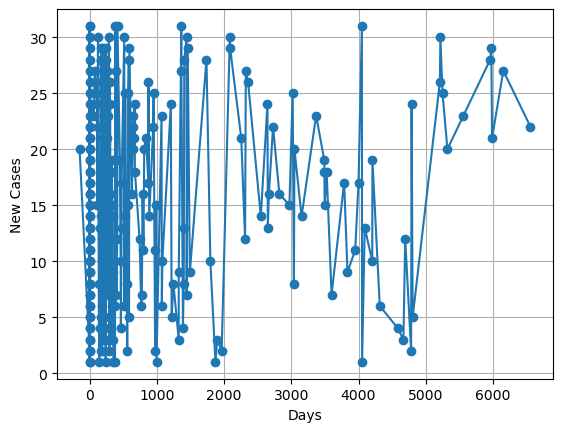

In [87]:
plt.plot(data["new_cases"],data["date"].dt.day, marker='o')
plt.xlabel("Days")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()